In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-6.695137886932102 -107.55734893195952
54.635536209394985 -172.62131431211662
-53.36201492549958 -122.16499764200022
8.083403725468713 -155.45064765086858
-83.40686525725071 51.245076380848275
-85.90587306863874 -153.39459695516962
-76.56046497182604 0.34912104937609456
-13.300460123012328 1.278383720609014
-0.13682112182488027 80.7980315257451
-45.886118827571494 -156.82407317706657
-67.3831635210341 81.22805973636002
-34.93955198963178 -60.024390926569055
8.769679821707797 -1.1462855030185324
-42.26369999461812 -6.778410304979161
-3.6982212627234503 34.88569362244061
-73.03929167716191 -175.26131221437382
64.45961530224747 55.65255329187349
58.643974912685934 125.47481995191214
-64.69723439395355 -49.13432981523874
-83.16779512120732 175.92860548202174
55.73261311684175 32.16548903581614
5.021755686059066 -8.239004814104703
37.81359559892503 -140.60793023151845
-3.70734330080748 26.17113263016472
-59.738633892205456 -121.01603347994725
73.52078182779172 148.09903669114635
-88.3144543

7.235302438952118 -158.2134955974683
1.5560542651585934 17.576797815775564
-87.32590395277523 -156.65222990701972
68.24867565671678 71.10478121587346
35.132709453895785 133.90498136699938
-80.32359458667503 77.39310362039924
69.04121548853007 163.33839268544278
81.75717633688714 -119.3348993502227
-18.662211267041855 173.1278349617234
59.874789966373015 22.884595514367504
-46.963994266112714 -120.87061964331158
-69.70119343476424 -1.395958126661668
-56.715836487277336 135.07246146491508
-18.38828111028417 178.6361793257915
12.076034976458331 120.68207594380891
82.78085362254967 -13.628666197612318
30.492737416486506 -164.72113897080405
84.18701982966837 154.7059608487674
-34.58709738561238 95.44230480079136
1.6897077727220449 117.00381183532619
6.578850469054316 150.7305618923005
71.61861907122614 -122.62421123088376
26.939907248145488 -77.19438797249525
-1.3638988293308358 -29.771159050779744
-69.28621697175701 16.600470753742144
-20.1500202985641 140.5976204820081
5.3229158087597455 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32c861c42f65c2af7298dd341c3d9d81


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | matara
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | chivilcoy
Processing Record 12 of Set 1 | salaga
Processing Record 13 of Set 1 | dongobesh
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | nizhniy odes
Processing Record 16 of Set 1 | leninskiy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | zharkovskiy
Processing Record 20 of Set 1 | harper
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | kampene
Processing Record 23 of Set 1 | chokurdakh
Pro

Processing Record 36 of Set 4 | walvis bay
Processing Record 37 of Set 4 | manbij
Processing Record 38 of Set 4 | loreto
Processing Record 39 of Set 4 | kautokeino
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | shahr-e babak
Processing Record 42 of Set 4 | shenjiamen
Processing Record 43 of Set 4 | amapa
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | halifax
Processing Record 46 of Set 4 | guanay
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | hiroshima
Processing Record 49 of Set 4 | berdigestyakh
Processing Record 50 of Set 4 | longlac
City not found. Skipping...
Processing Record 1 of Set 5 | esik
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | arlit
Processing Record 4 of Set 5 | deputatskiy
Processing Record 5 of Set 5 | aguimes
Processing Record 6 of Set 5 | camacha
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | saskylakh

Processing Record 30 of Set 8 | nesna
Processing Record 31 of Set 8 | carballo
Processing Record 32 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 33 of Set 8 | tomatlan
Processing Record 34 of Set 8 | tonantins
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | virginia beach
Processing Record 37 of Set 8 | arona
Processing Record 38 of Set 8 | yerofey pavlovich
Processing Record 39 of Set 8 | swellendam
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | myitkyina
Processing Record 45 of Set 8 | mamburao
Processing Record 46 of Set 8 | crab hill
City not found. Skipping...
Processing Record 47 of Set 8 | verkhnyaya inta
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | genhe
Processing Record 50 of Set 8 | stoyba
City not found. Skipping...
Processing R

Processing Record 16 of Set 12 | ust-kuyga
Processing Record 17 of Set 12 | westpunt
City not found. Skipping...
Processing Record 18 of Set 12 | labuhan
Processing Record 19 of Set 12 | ahuimanu
Processing Record 20 of Set 12 | guatire
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | meadow lake
Processing Record 23 of Set 12 | maputo
Processing Record 24 of Set 12 | springbok
Processing Record 25 of Set 12 | limoeiro do norte
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | mayo
Processing Record 28 of Set 12 | halalo
City not found. Skipping...
Processing Record 29 of Set 12 | muros
Processing Record 30 of Set 12 | praia da vitoria
Processing Record 31 of Set 12 | mao
Processing Record 32 of Set 12 | tessalit
Processing Record 33 of Set 12 | rocha
Processing Record 34 of Set 12 | erdenet
Processing Record 35 of Set 12 | wanaka
Processing Record 36 of Set 12 | marawi
Processing Record 37 of Set 12 | cradock
Processing Record 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
# print(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.55,91,26,3.00,EC,2022-07-23 05:08:43
1,Provideniya,64.3833,-173.3000,48.43,71,97,4.61,RU,2022-07-23 05:08:43
2,Rikitea,-23.1203,-134.9692,72.93,69,10,9.51,PF,2022-07-23 05:08:43
3,Hilo,19.7297,-155.0900,76.73,85,0,3.44,US,2022-07-23 05:08:44
4,Port Alfred,-33.5906,26.8910,59.56,79,100,11.43,ZA,2022-07-23 05:08:44
5,Mataura,-46.1927,168.8643,44.47,86,4,2.71,NZ,2022-07-23 05:08:44
6,Hermanus,-34.4187,19.2345,52.81,77,76,13.20,ZA,2022-07-23 05:08:44
7,Jamestown,42.0970,-79.2353,72.72,82,0,4.61,US,2022-07-23 05:08:45
8,Matara,5.9485,80.5353,82.22,79,50,14.63,LK,2022-07-23 05:08:45
9,Busselton,-33.6500,115.3333,56.07,89,99,17.81,AU,2022-07-23 05:08:45


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-07-23 05:08:43,-0.7393,-90.3518,69.55,91,26,3.00
1,Provideniya,RU,2022-07-23 05:08:43,64.3833,-173.3000,48.43,71,97,4.61
2,Rikitea,PF,2022-07-23 05:08:43,-23.1203,-134.9692,72.93,69,10,9.51
3,Hilo,US,2022-07-23 05:08:44,19.7297,-155.0900,76.73,85,0,3.44
4,Port Alfred,ZA,2022-07-23 05:08:44,-33.5906,26.8910,59.56,79,100,11.43
5,Mataura,NZ,2022-07-23 05:08:44,-46.1927,168.8643,44.47,86,4,2.71
6,Hermanus,ZA,2022-07-23 05:08:44,-34.4187,19.2345,52.81,77,76,13.20
7,Jamestown,US,2022-07-23 05:08:45,42.0970,-79.2353,72.72,82,0,4.61
8,Matara,LK,2022-07-23 05:08:45,5.9485,80.5353,82.22,79,50,14.63
9,Busselton,AU,2022-07-23 05:08:45,-33.6500,115.3333,56.07,89,99,17.81


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

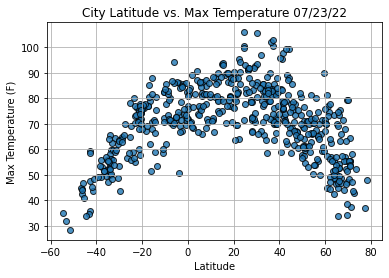

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

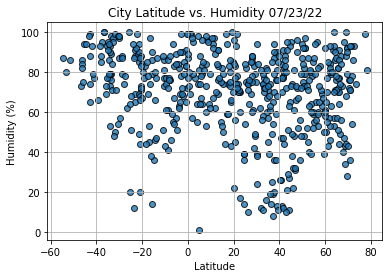

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

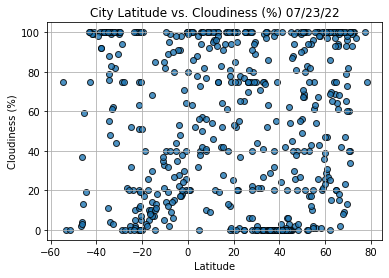

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

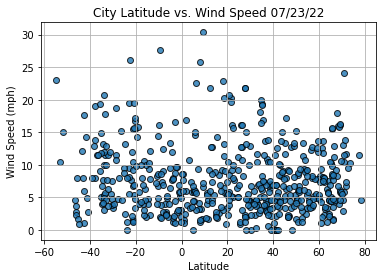

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-07-23 05:08:46
Lat                         -21.2
Lng                        -175.2
Max Temp                    71.76
Humidity                       88
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Provideniya,RU,2022-07-23 05:08:43,64.3833,-173.3000,48.43,71,97,4.61
3,Hilo,US,2022-07-23 05:08:44,19.7297,-155.0900,76.73,85,0,3.44
7,Jamestown,US,2022-07-23 05:08:45,42.0970,-79.2353,72.72,82,0,4.61
8,Matara,LK,2022-07-23 05:08:45,5.9485,80.5353,82.22,79,50,14.63
11,Salaga,GH,2022-07-23 05:08:46,8.5508,-0.5188,71.96,96,100,3.15
...,...,...,...,...,...,...,...,...,...
546,Nago,JP,2022-07-23 05:22:30,26.5881,127.9761,91.83,76,81,10.69
547,Aktau,KZ,2022-07-23 05:22:30,43.6500,51.2000,81.18,51,6,13.62
548,Abu Dhabi,AE,2022-07-23 05:19:18,24.4667,54.3667,105.82,39,0,9.22
549,Mangan,IN,2022-07-23 05:22:31,27.5167,88.5333,78.64,85,100,1.14


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

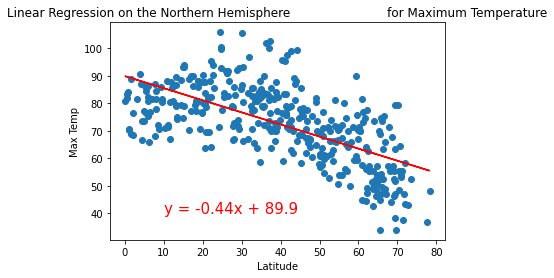

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

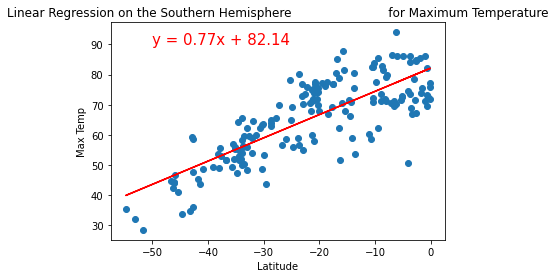

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

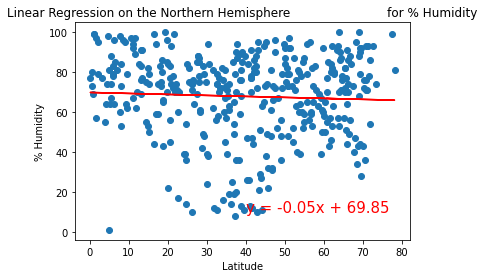

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

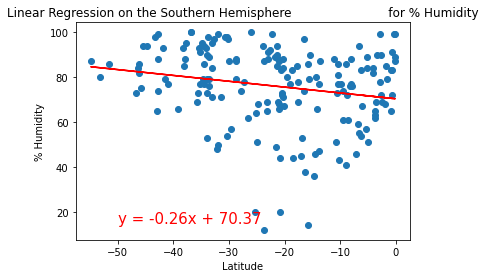

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

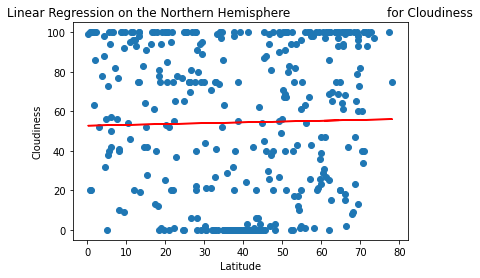

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))

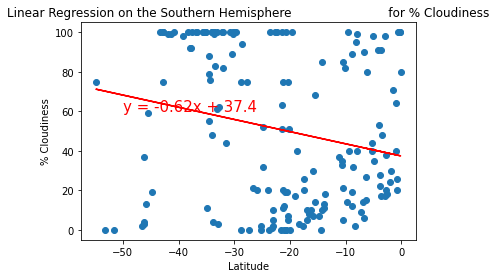

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

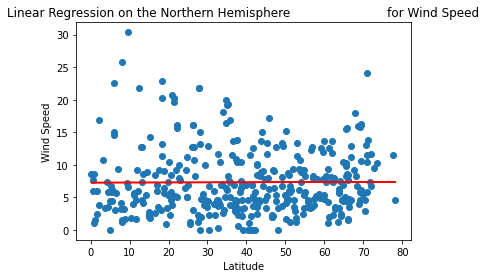

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))